# Aplicación Financiera: Riesgo Crediticio


Variables en el modelo:

##### Variable Target

Se obtiene de la combinación de las variables:

- P107E: ¿Ha tenido dificultades que le han impedido cumplir con el cronograma de pagos del crédito o préstamo obtenido? Si/No


##### Variables dependientes

- P207 : Sexo
- P208A : ¿Qué edad tiene en años cumplidos? - En años 
- P209 1 0 N ¿Cuál es su estado civil o conyugal?    
> 1. Conviviente 
> 2. Casado(a)
> 3. Viudo(a)  
> 4. Divorciado(a)  
> 5. Separado(a)  
> 6. Soltero(a)  

- P107D4 : ¿Cúal fue el Monto Total del Crédito recibido? N
- P524A1 : Ingreso - Ingreso total-monto (S/.)
- P523 1 : En su ocupación principal, ¿A Ud. le pagan: 
> 1. Diario?
> 2. Semanal?
> 3. Quincenal?
> 4. Mensual?  

- P301A N ¿Cuál es el último año o grado de estudios y nivel que aprobó? – Nivel educativo     
> 1 Sin nivel     
> 2  Inicial     
> 3 Primaria incompleta     
> 4 Primaria completa     
> 5 Secundaria incompleta     
> 6 Secundaria completa     
> 7 Superior no Universitaria Incompleta     
> 8 Superior no Universitaria Completa     
> 9 Superior Universitaria Incompleta     
> 10 Superior Universitaria Completa     
> 11 Maestri/Doctorado     
> 12 Básica especial 

- ESTRATO: area urbana/rural
- P105A 1 0 N ¿La vivienda que ocupa su hogar es ?     
> 1 Alquilada     
> 2 Propia, totalmente pagada     
> 3 Propia, por invasión     
> 4 Propia, comprándola a plazos     
> 5 Cedida por el centro de trabajo     
> 6 Cedida por otro hogar o institución     
> 7 Otra forma   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [266]:
data1=pd.read_csv('Enaho01-2020-100.csv',encoding='latin')
data1.columns

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (322) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'PERIODO', 'TIPENC',
       ...
       'FACTOR07', 'FACTOR_P', 'RECHAZO_RAZONES', 'NCONGLOME', 'SUB_CONGLOME',
       'CODCCPP', 'NOMCCPP', 'LONGITUD', 'LATITUD', 'ALTITUD'],
      dtype='object', length=331)

In [267]:
data1 = data1[['CONGLOME','VIVIENDA','HOGAR','UBIGEO',"P107E","P107D4","ESTRATO","P105A"]]
data1.head()

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,P107E,P107D4,ESTRATO,P105A
0,5009,12,11,10101,,,4,6
1,5009,41,11,10101,,,4,2
2,5009,56,11,10101,,,4,
3,5009,84,11,10101,,,4,
4,5009,98,11,10101,,,4,1


In [4]:
data2=pd.read_csv('Enaho01-2020-200.csv',encoding='latin')
data2.columns

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO',
       'DOMINIO', 'ESTRATO', 'P201P', 'P203', 'P203A', 'P203B', 'P204', 'P205',
       'P206', 'P207', 'P208A', 'P208B', 'P209', 'P210', 'P211A', 'P211D',
       'P212', 'P213', 'P214', 'P215', 'P216', 'P217', 'T211', 'OCUPAC_R3',
       'OCUPAC_R4', 'RAMA_R3', 'RAMA_R4', 'CODTAREA', 'CODTIEMPO', 'TICUEST01',
       'TIPOCUESTIONARIO', 'TIPOENTREVISTA', 'FACPOB07', 'FACTOR_P',
       'NCONGLOME', 'SUB_CONGLOME'],
      dtype='object')

In [5]:
data2 = data2[['CONGLOME','VIVIENDA','HOGAR','UBIGEO',"P207","P208A","P209"]]
data2.head()

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,P207,P208A,P209
0,5009,12,11,10101,2,49,5
1,5009,12,11,10101,2,16,6
2,5009,41,11,10101,2,61,6
3,5009,41,11,10101,2,29,6
4,5009,41,11,10101,2,10,


In [6]:
data3=pd.read_csv('Enaho01A-2020-300.csv',encoding='latin')
data3.columns

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,13,26,32,59,130,296,311,559,560,565) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO',
       'DOMINIO', 'ESTRATO', 'CODINFOR',
       ...
       'I3120C', 'NIVEL', 'TICUEST01A', 'TIPOCUESTIONARIO', 'TIPOENTREVISTA',
       'FACTOR07', 'FACTORA07', 'FACTORA_P', 'NCONGLOME', 'SUB_CONGLOME'],
      dtype='object', length=568)

In [7]:
data3= data3[['CONGLOME','VIVIENDA','HOGAR','UBIGEO',"P301A"]]
data3.head()

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,P301A
0,5009,12,11,10101,6
1,5009,12,11,10101,6
2,5009,41,11,10101,1
3,5009,41,11,10101,10
4,5009,98,11,10101,5


In [8]:
data5=pd.read_csv('Enaho01A-2020-500.csv',encoding='latin')
data5.columns

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (229,234,239,247,252,257,262,267,272,277,282,287,292,297,302,307,311,316,320,325,329,334,341,344,347,350,353,356,359,362,365,366,367,369,371,373,375,377,379,381,382,383,384,385,386,387,391,484,485,486,487,934,935,936,937,938,939,940,941,942,943,1014,1017,1022,1408) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO',
       'DOMINIO', 'ESTRATO', 'CODINFOR',
       ...
       'OCU500', 'OCUPINF', 'EMPLPSEC', 'FAC500A', 'FAC500_P', 'TICUEST01A',
       'TIPOCUESTIONARIO', 'TIPOENTREVISTA', 'NCONGLOME', 'SUB_CONGLOME'],
      dtype='object', length=1414)

In [9]:
data5= data5[['CONGLOME','VIVIENDA','HOGAR','UBIGEO',"P524A1","P523"]]
data5.head()

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,P524A1,P523
0,5009,12,11,10101,,
1,5009,12,11,10101,,
2,5009,41,11,10101,,
3,5009,41,11,10101,200,4
4,5009,98,11,10101,,


In [268]:
d1 = pd.merge(data1, data2, on=['CONGLOME','VIVIENDA','HOGAR','UBIGEO'])

In [269]:
d2 = pd.merge(d1, data3,  on=['CONGLOME','VIVIENDA','HOGAR','UBIGEO'])

In [270]:
d3 = pd.merge(d2, data5,  on=['CONGLOME','VIVIENDA','HOGAR','UBIGEO'])
d3

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,P107E,P107D4,ESTRATO,P105A,P207,P208A,P209,P301A,P524A1,P523
0,5009,12,11,10101,,,4,6,2,49,5,6,,
1,5009,12,11,10101,,,4,6,2,49,5,6,,
2,5009,12,11,10101,,,4,6,2,49,5,6,,
3,5009,12,11,10101,,,4,6,2,49,5,6,,
4,5009,12,11,10101,,,4,6,2,16,6,6,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958030,20305,137,11,250301,,,4,6,2,6,,6,150,2
1958031,20305,137,11,250301,,,4,6,2,6,,3,150,2
1958032,20305,137,11,250301,,,4,6,2,6,,3,150,2
1958033,20305,137,11,250301,,,4,6,2,6,,2,150,2


In [271]:
d3 = d3.rename(columns = {'P107E':'prob_pago',
                           'P107D4': 'MONTO_CREDITO',
 'P207': 'SEXO',
 'P208A': 'EDAD',
 'P209': 'ESTADO_CIVIL',
 'P301A': 'EDUCACION',
 'P524A1': 'INGRESO',
 'P523': 'INGRESO_T',
'P105A': "T_VIVIENDA"
})


In [272]:
d3.head()

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,prob_pago,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,INGRESO,INGRESO_T
0,5009,12,11,10101,,,4,6,2,49,5,6,,
1,5009,12,11,10101,,,4,6,2,49,5,6,,
2,5009,12,11,10101,,,4,6,2,49,5,6,,
3,5009,12,11,10101,,,4,6,2,49,5,6,,
4,5009,12,11,10101,,,4,6,2,16,6,6,,


In [273]:
d3.dtypes

CONGLOME          int64
VIVIENDA          int64
HOGAR             int64
UBIGEO            int64
prob_pago        object
MONTO_CREDITO    object
ESTRATO           int64
T_VIVIENDA       object
SEXO             object
EDAD             object
ESTADO_CIVIL     object
EDUCACION        object
INGRESO          object
INGRESO_T        object
dtype: object

## Convertir mis variables objetos a numeric

In [274]:
d3['MONTO_CREDITO']=pd.to_numeric(d3['MONTO_CREDITO'], errors='coerce')
d3['MONTO_CREDITO'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: MONTO_CREDITO, dtype: float64

In [275]:
d3['EDAD']=pd.to_numeric(d3['EDAD'], errors='coerce')
d3['EDAD'].head()

0    49.0
1    49.0
2    49.0
3    49.0
4    16.0
Name: EDAD, dtype: float64

In [276]:
d3['INGRESO']=pd.to_numeric(d3['INGRESO'], errors='coerce')
d3['INGRESO'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: INGRESO, dtype: float64

## Filtro a los NAs

In [277]:
d3= d3[d3["MONTO_CREDITO"].notnull() & d3["INGRESO"].notnull() & d3["INGRESO_T"].notnull()]
d3.tail()

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,prob_pago,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,INGRESO,INGRESO_T
1953801,19710,44,11,220405,2,2000.0,6,2,1,16.0,6,2,210.0,2
1953804,19710,44,11,220405,2,2000.0,6,2,2,6.0,,4,210.0,2
1953807,19710,44,11,220405,2,2000.0,6,2,2,6.0,,4,210.0,2
1953810,19710,44,11,220405,2,2000.0,6,2,2,6.0,,5,210.0,2
1953813,19710,44,11,220405,2,2000.0,6,2,2,6.0,,2,210.0,2


## Crear la variable ingreso mensual

In [278]:
d3['INGRESO']=d3['INGRESO'].apply(np.int64)
d3['INGRESO'].head()
d3['INGRESO_T']=d3['INGRESO_T'].apply(np.int64)
d3['INGRESO_T'].head()

9967    4
9969    4
9971    4
9973    4
9975    4
Name: INGRESO_T, dtype: int64

In [279]:
d3['iNGRESO_MENSUAL']=d3['INGRESO']*d3['INGRESO_T']
d3['iNGRESO_MENSUAL'].head()

9967    4400
9969    4400
9971    4400
9973    4400
9975    4400
Name: iNGRESO_MENSUAL, dtype: int64

## Crear la variable area urbana / rural

In [280]:
d3['ESTRATO']= d3['ESTRATO'].replace({1:1,2:1,3:1,4:1,5:1,6:0,7:0,8:0})
d3['ESTRATO']

9967       1
9969       1
9971       1
9973       1
9975       1
          ..
1953801    0
1953804    0
1953807    0
1953810    0
1953813    0
Name: ESTRATO, Length: 1438, dtype: int64

In [281]:
d3.head()

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,prob_pago,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,INGRESO,INGRESO_T,iNGRESO_MENSUAL
9967,5269,28,11,21201,2,2000.0,1,6,1,32.0,1,4,1100,4,4400
9969,5269,28,11,21201,2,2000.0,1,6,1,32.0,1,3,1100,4,4400
9971,5269,28,11,21201,2,2000.0,1,6,1,32.0,1,3,1100,4,4400
9973,5269,28,11,21201,2,2000.0,1,6,1,32.0,1,3,1100,4,4400
9975,5269,28,11,21201,2,2000.0,1,6,2,29.0,1,4,1100,4,4400


In [282]:
## Explorando variable educacion

In [283]:
d3["EDUCACION"].value_counts()

6     242
10    170
5     153
4     143
3     129
9      86
8      71
11     58
10     47
3      46
2      40
4      38
2      33
7      29
5      27
1      26
6      22
9      18
11     17
8      13
1      10
7      10
12     10
Name: EDUCACION, dtype: int64

In [284]:
d3['EDUCACION']= d3['EDUCACION'].replace({1:'No graduado', 2:'No graduado',3:'No graduado', 4:'No graduado',5:'No graduado',
                                          6:'No graduado', 7:'No graduado',8:'No graduado',9:'No graduado',
                                          10:'Graduado', 11:'Graduado', 12:'No graduado', '10':'Graduado',
                                          '1':'No graduado', '2':'No graduado','3':'No graduado','4':'No graduado',
                                          '5':'No graduado', '6':'No graduado', '7':'No graduado','8':'No graduado',
                                          '9':'No graduado',  '11':'Graduado'
                                         })
d3["EDUCACION"].value_counts()

No graduado    1146
Graduado        292
Name: EDUCACION, dtype: int64

# Filtrar mayores de 18 años

In [285]:
d3= d3[d3["EDAD"]>=18]
d3.tail()

,CONGLOME,VIVIENDA,HOGAR,UBIGEO,prob_pago,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,INGRESO,INGRESO_T,iNGRESO_MENSUAL
1953777,19710,44,11,220405,2,2000.0,0,2,1,51.0,1,No graduado,210,2,420
1953780,19710,44,11,220405,2,2000.0,0,2,2,46.0,1,No graduado,210,2,420
1953783,19710,44,11,220405,2,2000.0,0,2,2,46.0,1,No graduado,210,2,420
1953786,19710,44,11,220405,2,2000.0,0,2,2,46.0,1,No graduado,210,2,420
1953789,19710,44,11,220405,2,2000.0,0,2,2,46.0,1,No graduado,210,2,420


## Base a trabajar

In [286]:
base_final = d3.drop(columns=['CONGLOME', 'VIVIENDA','HOGAR','INGRESO_T', 'INGRESO'])
base_final.head()

,UBIGEO,prob_pago,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,iNGRESO_MENSUAL
9967,21201,2,2000.0,1,6,1,32.0,1,No graduado,4400
9969,21201,2,2000.0,1,6,1,32.0,1,No graduado,4400
9971,21201,2,2000.0,1,6,1,32.0,1,No graduado,4400
9973,21201,2,2000.0,1,6,1,32.0,1,No graduado,4400
9975,21201,2,2000.0,1,6,2,29.0,1,No graduado,4400


In [287]:
base_final.dtypes

UBIGEO               int64
prob_pago           object
MONTO_CREDITO      float64
ESTRATO              int64
T_VIVIENDA          object
SEXO                object
EDAD               float64
ESTADO_CIVIL        object
EDUCACION           object
iNGRESO_MENSUAL      int64
dtype: object

In [288]:
base_final.describe()

,UBIGEO,MONTO_CREDITO,ESTRATO,EDAD,iNGRESO_MENSUAL
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,155750.085233,25296.828543,0.728444,39.448959,6808.907830
std,74709.590428,62522.078242,0.444983,14.224379,6323.764909
min,10203.000000,1000.000000,0.000000,18.000000,20.000000
25%,90207.000000,5000.000000,0.000000,27.000000,1000.000000
50%,200101.000000,10000.000000,1.000000,39.000000,6000.000000
75%,210101.000000,20000.000000,1.000000,52.000000,10800.000000
max,250107.000000,600000.000000,1.000000,80.000000,34000.000000


In [289]:
base_final.describe(include="O")

,prob_pago,T_VIVIENDA,SEXO,ESTADO_CIVIL,EDUCACION
count,1009,1009,1009,1009,1009
unique,2,4,2,6,2
top,2,2,1,6,No graduado
freq,902,932,525,417,758


In [290]:
base_final["prob_pago"].value_counts()

2    902
1    107
Name: prob_pago, dtype: int64

In [294]:
#Diferenciamos variables continuas, de las categoricas
cols_continuas = ["EDAD","ESTRATO", "iNGRESO_MENSUAL"]
cols_categoricas = ["SEXO","ESTADO_CIVIL","EDUCACION", "T_VIVIENDA"]

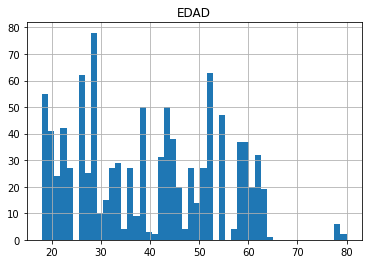

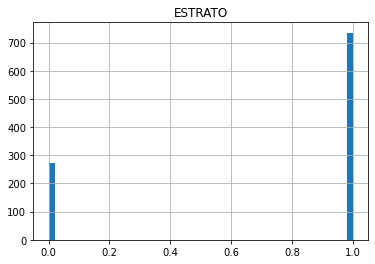

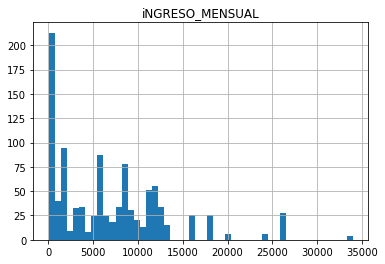

In [295]:
for c in cols_continuas:
    fig, ax = plt.subplots()
    base_final[c].hist(bins=50, ax= ax)
    ax.set_title(c)
    plt.show()

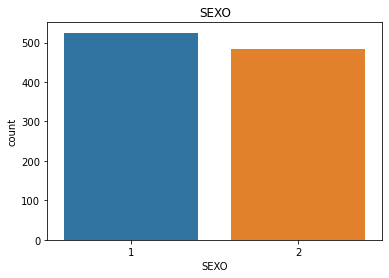

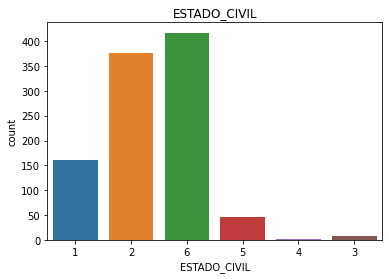

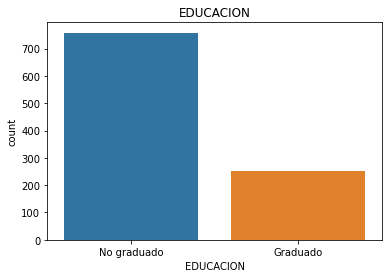

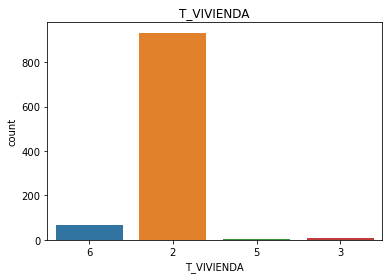

In [296]:
for c in cols_categoricas:
    fig, ax = plt.subplots()
    sns.countplot(x =c, data = base_final)
    ax.set_title(c)
    plt.show()

In [297]:
## Evaluar valores extremos

In [298]:
df_aux = pd.DataFrame()

for c in cols_continuas:
    p1 = base_final[c].quantile(0.01) 
    p5 = base_final[c].quantile(0.05)
    p95 = base_final[c].quantile(0.95)
    p99 = base_final[c].quantile(0.99)
    lst = [[c,p1,p5,p95,p99]]
    df_temp = pd.DataFrame(lst, columns =['Variable', 'P1','P5','P95','P99'])
    df_aux = df_aux.append(df_temp)
    df_aux.reset_index(drop=True,inplace=True)

In [299]:
df_aux.head()

,Variable,P1,P5,P95,P99
0,EDAD,19.0,19.0,62.0,63.0
1,ESTRATO,0.0,0.0,1.0,1.0
2,iNGRESO_MENSUAL,20.0,204.0,18000.0,26000.0


In [300]:
cols= df_aux["Variable"].unique()

In [301]:
for c in cols:
    cota_izquierda = df_aux.loc[df_aux["Variable"] == c,"P5"].values[0]
    cota_derecha = df_aux.loc[df_aux["Variable"] == c ,"P95"].values[0]
    base_final[c] = base_final[c].astype("float64")
    base_final.loc[base_final[c] > cota_derecha,c] = cota_derecha
    base_final.loc[base_final[c] < cota_izquierda,c] = cota_izquierda

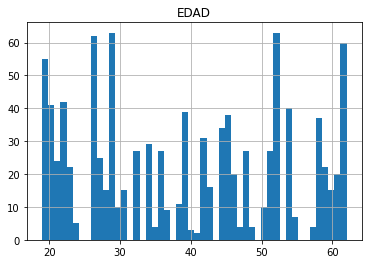

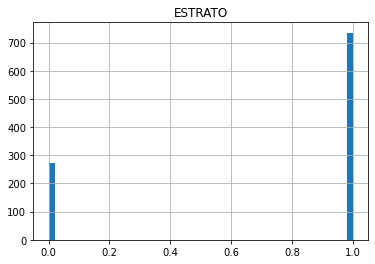

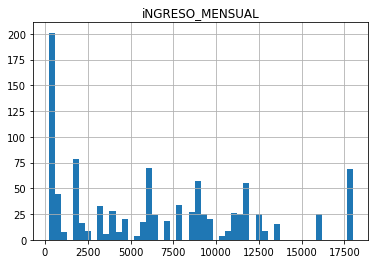

In [302]:
for c in cols_continuas:
    fig, ax = plt.subplots()
    base_final[c].hist(bins=50, ax= ax)
    ax.set_title(c)
    plt.show()

In [303]:
## Recodificando valores

In [304]:
base_final['EDUCACION'] = base_final['EDUCACION'].replace({'Graduado': 1,'No graduado': 2})
base_final['EDUCACION'].value_counts()

2    758
1    251
Name: EDUCACION, dtype: int64

In [305]:
base_final['prob_pago'] = base_final['prob_pago'].replace({'2': 0})
base_final['prob_pago'].value_counts()

0    902
1    107
Name: prob_pago, dtype: int64

In [312]:
base_final['T_VIVIENDA'] = base_final['T_VIVIENDA'].replace({'2': 1,'3': 1,'4': 1,'5': 0, 6: 0, 5: 0,3: 1})
base_final['T_VIVIENDA'].value_counts()

1    940
0     69
Name: T_VIVIENDA, dtype: int64

In [313]:
base_final.head()

,UBIGEO,prob_pago,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,iNGRESO_MENSUAL
9967,21201,0,2000.0,1.0,0,1,32.0,1,2,4400.0
9969,21201,0,2000.0,1.0,0,1,32.0,1,2,4400.0
9971,21201,0,2000.0,1.0,0,1,32.0,1,2,4400.0
9973,21201,0,2000.0,1.0,0,1,32.0,1,2,4400.0
9975,21201,0,2000.0,1.0,0,2,29.0,1,2,4400.0


### Particionar la muestra 

In [314]:
X, y = base_final.drop(columns = ["prob_pago"]), base_final["prob_pago"]

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

In [348]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (564, 9) (564,)
Test set: (243, 9) (243,)


In [349]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [350]:
df_train.head()

,UBIGEO,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,iNGRESO_MENSUAL,prob_pago
1950430,200506,5000.0,1.0,1,1,62.0,2,2,210.0,0
1950478,200506,5000.0,1.0,1,2,58.0,2,2,210.0,0
1653307,200104,10000.0,1.0,1,1,19.0,6,2,204.0,0
49204,100801,2000.0,0.0,1,1,46.0,2,2,240.0,0
140052,250105,10000.0,1.0,1,1,52.0,2,1,204.0,0


In [351]:
df_test.head()

,UBIGEO,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,iNGRESO_MENSUAL,prob_pago
171108,20101,15000.0,1.0,0,2,34.0,2,1,2000.0,0
470825,220901,600000.0,1.0,1,1,22.0,6,2,12920.0,1
181166,40115,20000.0,0.0,1,2,28.0,1,2,9200.0,0
140132,250105,10000.0,1.0,1,1,19.0,6,2,204.0,0
123159,210101,4000.0,1.0,1,1,52.0,2,2,18000.0,0


In [352]:
### Analisis missings

In [353]:
def num_missing(x):
    return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (df_train.apply(num_missing, axis=0))

Valores perdidos por columna
UBIGEO             0
MONTO_CREDITO      0
ESTRATO            0
T_VIVIENDA         0
SEXO               0
EDAD               0
ESTADO_CIVIL       0
EDUCACION          0
iNGRESO_MENSUAL    0
prob_pago          0
dtype: int64


In [354]:
target ="prob_pago"

In [355]:
from scipy.stats import mode

for column in cols_categoricas:
    if column != target:
        df_train[column] = df_train[column].fillna(df_train[column].mode()[0])
    
for column in cols_continuas:
    if column != target:
        df_train[column] = df_train[column].fillna(df_train[column].median())

### Balanceo de datos 

Se evalua la distribución de las clases a predecir, en nuestro caso de loans prediction es 2 y 1 las clases, siendo 1 el evento de interes de que si hizo default o impago la persona.

In [356]:
df_train["prob_pago"].value_counts()

0    497
1     67
Name: prob_pago, dtype: int64

In [357]:
cols = df_train.columns

In [358]:
X, y = df_train.drop(columns = [target]), df_train["prob_pago"]

In [359]:
X.head()

,UBIGEO,MONTO_CREDITO,ESTRATO,T_VIVIENDA,SEXO,EDAD,ESTADO_CIVIL,EDUCACION,iNGRESO_MENSUAL
1950430,200506,5000.0,1.0,1,1,62.0,2,2,210.0
1950478,200506,5000.0,1.0,1,2,58.0,2,2,210.0
1653307,200104,10000.0,1.0,1,1,19.0,6,2,204.0
49204,100801,2000.0,0.0,1,1,46.0,2,2,240.0
140052,250105,10000.0,1.0,1,1,52.0,2,1,204.0


In [360]:
y.head()

1950430    0
1950478    0
1653307    0
49204      0
140052     0
Name: prob_pago, dtype: int64

In [361]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

columns_X = X.columns
columns_y = [target]

df_X_sm = pd.DataFrame(data=X_sm,columns=columns_X)
df_y_sm = pd.DataFrame(data=y_sm,columns=columns_y)

# Concatenamos la información
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [362]:
df_balanceado_sm["prob_pago"].value_counts()

0    497
1    497
Name: prob_pago, dtype: int64

In [363]:
df_balanceado_sm.shape

(994, 10)

In [364]:
X_ros = df_X_sm
y_ros = df_y_sm

### Selección de Variables

In [365]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model,8)
fit = rfe.fit(X_ros, y_ros)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


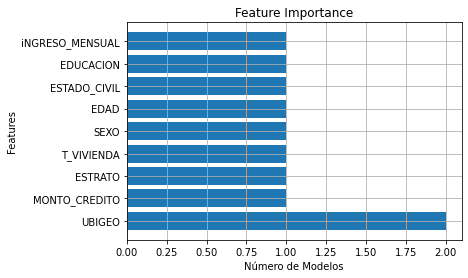

In [366]:
# horizontal bar plot of feature importance
pos = np.arange(len(X_ros.columns)) + 0.5
plt.barh(pos, fit.ranking_, align='center')
plt.title("Feature Importance")
plt.xlabel("Número de Modelos")
plt.ylabel("Features")
plt.yticks(pos, (X.columns))
plt.grid(True)

In [367]:
fit.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True])

In [368]:
features_selected = X.columns[fit.support_]

In [369]:
features_selected

Index(['MONTO_CREDITO', 'ESTRATO', 'T_VIVIENDA', 'SEXO', 'EDAD',
       'ESTADO_CIVIL', 'EDUCACION', 'iNGRESO_MENSUAL'],
      dtype='object')

In [370]:
y_train = y_ros
X_train = X_ros[features_selected]

In [371]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10)
lr = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
results

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

10-fold cross validation average accuracy: 0.613


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.62      , 0.63      , 0.53      , 0.58      , 0.65656566,
       0.64646465, 0.74747475, 0.66666667, 0.47474747, 0.57575758])

In [372]:
### Evaluación del Modelo

In [373]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

In [374]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [375]:
X_test = df_test[features_selected]
y_pred=lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

In [376]:
### Indicadores de rendimiento de modelos

In [377]:
# Obtenemos la matriz de confusión con las métricas anteriores
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74       218
           1       0.16      0.64      0.26        25

    accuracy                           0.62       243
   macro avg       0.55      0.63      0.50       243
weighted avg       0.86      0.62      0.69       243



In [378]:
print("\tIndicadores:")
print("\t1. Accuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\t2. Precision: %1.3f" % precision_score(y_test, y_pred))
print("\t3. Recall: %1.3f" % recall_score(y_test, y_pred))
print("\t4. F1: %1.3f" % f1_score(y_test, y_pred))
print("\t5. Log loss: %1.3f\n" % log_loss(y_test, yhat_prob))

	Indicadores:
	1. Accuracy: 0.617
	2. Precision: 0.160
	3. Recall: 0.640
	4. F1: 0.256
	5. Log loss: 0.586

